In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [355]:
#Reading excel sheet 
mean_age_marriages = pd.read_excel("SF_3_1_Marriage_divorce_rates.xlsx", sheet_name= 'MeanAgeFirstMarriage', header = 3, indexcol=0, skipfooter = 25)

In [356]:
#forward filling Country column in order to remove NaN 
mean_age_marriages["Country"] = mean_age_marriages["Country"].ffill()

# Changing data types to numeric
cols = mean_age_marriages.columns.drop(["Country",  "Gender"])
cols
mean_age_marriages[cols] = mean_age_marriages[cols].apply(pd.to_numeric, errors='coerce')


In [357]:
mean_age_marriages.head()

,Country,Gender,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Australia,Male,26.5,26.7,26.9,27.0,27.2,27.3,27.6,27.8,...,29.6,29.6,29.6,29.6,29.7,29.8,29.9,30.0,30.1,30.3
1,Australia,Female,24.3,24.5,24.7,24.8,25.1,25.3,25.7,25.9,...,27.6,27.7,27.7,27.9,28.0,28.1,28.3,28.4,28.5,28.7
2,Austria,Male,27.7,27.9,28.0,28.4,28.7,29.0,29.1,29.3,...,32.0,32.2,32.5,32.7,32.9,33.2,NaN,NaN,NaN,NaN
3,Austria,Female,25.2,25.4,25.6,25.8,26.1,26.3,26.5,26.8,...,29.3,29.5,29.9,33.5,30.3,30.6,NaN,NaN,NaN,NaN
4,Belgium,Male,26.5,26.7,27.0,27.2,27.4,27.8,28.0,28.1,...,31.0,31.4,31.7,31.7,NaN,NaN,NaN,NaN,NaN,NaN


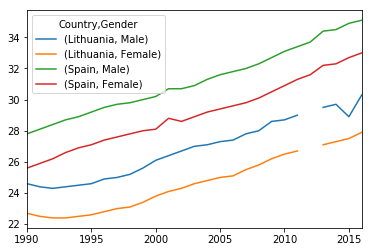

In [359]:
#Selecting only Spain and Lithuania
mean_age_marriages_select = mean_age_marriages.get((mean_age_marriages.Country == "Spain") | (mean_age_marriages.Country == "Lithuania"))
mean_age_marriages_select.set_index(["Country", "Gender"], inplace = True)
mean_age_marriages_select.T.plot()





In [245]:
mean_age_marriages_select.T

Country Lithuania        Spain       
Gender       Male Female  Male Female
1990         24.6   22.7  27.8   25.6
1991         24.4   22.5  28.1   25.9
1992         24.3   22.4  28.4   26.2
1993         24.4   22.4  28.7   26.6
1994         24.5   22.5  28.9   26.9
1995         24.6   22.6  29.2   27.1
1996         24.9   22.8  29.5   27.4
1997           25     23  29.7   27.6
1998         25.2   23.1  29.8   27.8
1999         25.6   23.4    30     28
2000         26.1   23.8  30.2   28.1
2001         26.4   24.1  30.7   28.8
2002         26.7   24.3  30.7   28.6
2003           27   24.6  30.9   28.9
2004         27.1   24.8  31.3   29.2
2005         27.3     25  31.6   29.4
2006         27.4   25.1  31.8   29.6
2007         27.8   25.5    32   29.8
2008           28   25.8  32.3   30.1
2009         28.6   26.2  32.7   30.5
2010         28.7   26.5  33.1   30.9
2011           29   26.7  33.4   31.3
2012           ..     ..  33.7   31.6
2013         29.5   27.1  34.4   32.2
2014         29.7   27.3  34.5   32.3
2015         28.9   27.5  34.9   32.7
2016         30.3   27.9  35.1     33

In [241]:
#Reading in divorce sheet
divorce = pd.read_excel("SF_3_1_Marriage_divorce_rates.xlsx", sheet_name= 'DivorceRate', header = 3, skipfooter = 17)


In [217]:
#dropping Note column as it has no valuable info
divorce = divorce.drop(columns = ["Note", 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979])


In [218]:
# the data was read in as object due to missing values. Selecting columns to convert to numeric
cols = divorce.columns.drop('Country', "Gender")
cols

Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016],
      dtype='object')

In [219]:
# converting to numeric
divorce[cols] = divorce[cols].apply(pd.to_numeric, errors='coerce')

divorce_select = divorce.get((divorce.Country == "Spain") | (divorce.Country == "Lithuania"))
divorce_select

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
18,Lithuania,3.2,3.2,3.1,3.2,3.2,3.2,3.3,3.2,3.2,...,3.5,3.2,2.9,3.2,3.4,3.5,3.4,3.3,3.2,3.1
28,Spain,NaN,0.3,0.6,0.5,0.5,0.5,0.5,0.5,0.6,...,2.8,2.4,2.1,2.2,2.2,2.2,2.0,2.2,2.1,2.1


In [220]:
# setting index to country so I can plot transposed table
divorce.set_index("Country", inplace = True)
div_top = divorce.sort_values(2016, ascending = False).head(10)


In [221]:
div_top

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,,,,,,,,,,,,,,,
United States,NaN,NaN,NaN,NaN,NaN,5.0016,NaN,NaN,NaN,NaN,...,3.6,3.5,3.5,3.6,3.6,3.4,3.3,3.2,3.1,3.2
Lithuania,3.2,3.2,3.1,3.2,3.2,3.2000,3.3,3.2,3.2,3.3,...,3.5,3.2,2.9,3.2,3.4,3.5,3.4,3.3,3.2,3.1
Latvia,5.0,4.9,4.8,4.9,4.7,4.5000,4.3,4.1,4.1,4.2,...,3.4,2.9,2.4,2.4,4.0,3.6,3.5,3.1,2.6,3.1
Denmark,2.7,2.8,2.9,2.9,2.8,2.8000,2.8,2.8,2.9,3.0,...,2.6,2.7,2.7,2.6,2.6,2.8,3.4,3.4,2.9,3.0
Estonia,4.1,4.1,3.9,4.2,4.1,4.0000,3.9,3.9,3.8,3.8,...,2.8,2.6,2.4,2.2,2.3,2.4,2.5,2.4,2.6,2.5
Finland,2.0,2.0,2.0,2.0,2.0,1.8000,2.0,2.0,2.5,2.9,...,2.5,2.5,2.5,2.5,2.5,2.4,2.5,2.5,2.5,2.5
Sweden,2.4,2.4,2.5,2.5,2.4,2.4000,2.3,2.2,2.1,2.2,...,2.3,2.3,2.4,2.5,2.5,2.5,2.8,2.7,2.5,2.4
Czech Republic,2.6,2.7,2.7,2.8,3.0,2.9000,2.9,3.0,3.0,3.0,...,3.0,3.0,2.8,2.9,2.7,2.5,2.7,2.5,2.5,2.4
Cyprus,0.3,0.3,0.4,0.5,0.5,0.5000,0.5,0.6,0.6,0.6,...,2.1,2.1,2.2,2.3,2.3,2.4,2.2,2.2,2.1,2.3


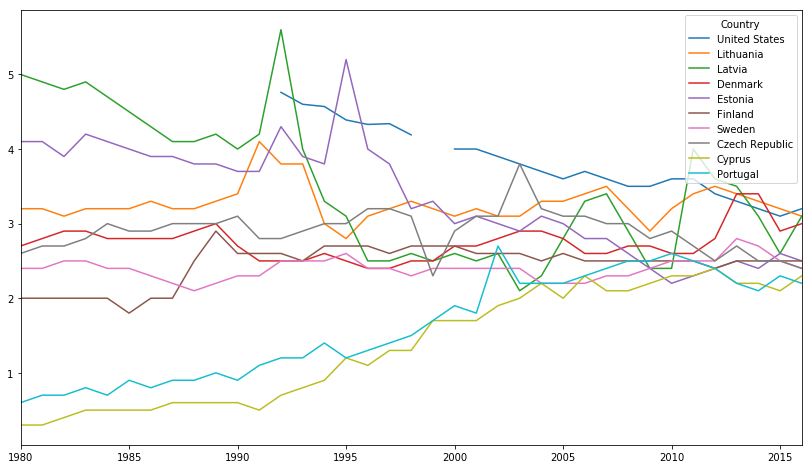

In [222]:
div_top.T.plot(figsize = (14,8))

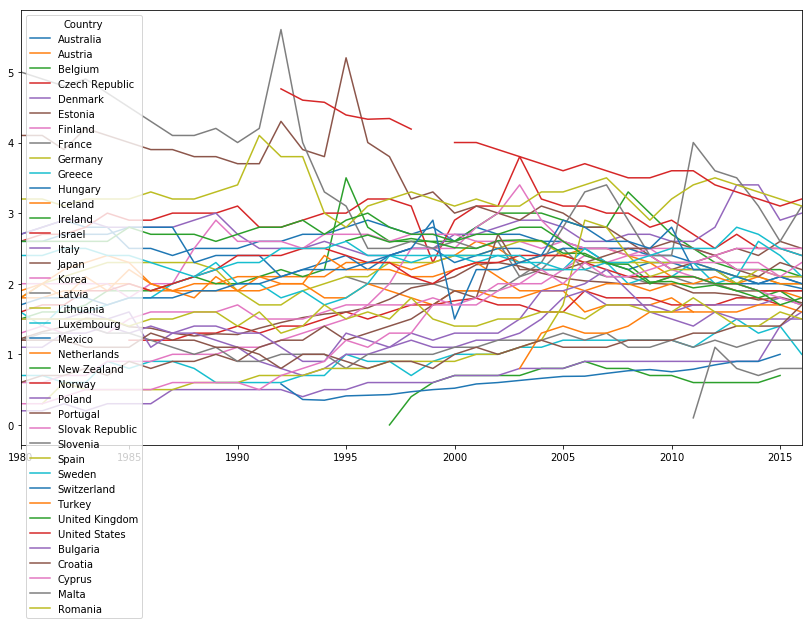

In [223]:
# plotting transposed table. Will need to remove some countries to make it actually readable
divorce.T.plot(figsize = (14,8))

In [310]:
previous_marriages = pd.read_excel("SF_3_1_Marriage_divorce_rates.xlsx", sheet_name= 'PrevMaritalStatus', header = 3, skipfooter = 12)

In [311]:
previous_marriages = previous_marriages.drop(columns = ["Note", 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979])


In [312]:
previous_marriages["Country"] = previous_marriages["Country"].ffill()
previous_marriages

,Country,Unnamed: 2,1980,1981,1982,1983,1984,1985,1986,1987,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Australia,Single never married,77.2245,77.1555,77.0418,..,..,76.3509,76.034,76.4714,...,77.6796,78.1699,78.9503,79.5507,79.7239,79.9968,80.4857,80.4739,80.099,80.2527
1,Australia,Divorced,19.4874,19.8249,20.1583,..,..,20.9402,21.1308,20.7625,...,20.5872,20.1577,19.48,18.9564,18.7854,18.5893,18.1878,18.1424,18.5149,18.3364
2,Australia,Widowed,3.28817,3.01962,2.79985,..,..,2.70882,2.83519,2.76614,...,1.73312,1.67234,1.56971,1.4991,1.48701,1.41184,1.33113,1.3837,1.39003,1.41595
3,Austria,Single never married,84.053,83.8344,84.5066,85.7124,83.218,82.1417,82.52,87.5474,...,..,74.758,75.5575,75.4841,75.6904,76.6934,77.0822,77.4961,77.6886,78.1499
4,Austria,Divorced,14.0013,14.0376,13.9506,12.8999,15.3002,16.2514,16.0112,11.4244,...,..,24.2455,23.5163,23.5118,23.405,22.3453,21.9826,21.5134,21.4766,20.9011
5,Austria,Widowed,1.94573,2.12799,1.54272,1.38773,1.48179,1.60697,1.46876,1.02815,...,..,0.996508,0.926161,1.00413,0.904574,0.961339,0.935252,0.990443,0.834794,0.948986
6,Belgium,Single never married,89.5087,88.929,88.2886,87.6612,86.6923,86.6963,86.5155,85.2828,...,72.4625,73.4657,73.8504,73.4804,..,..,..,..,..,..
7,Belgium,Divorced,8.88894,9.50916,10.2493,11.0081,11.8856,11.9981,12.1759,13.3913,...,26.1633,25.3457,24.8567,25.3446,..,..,..,..,..,..
8,Belgium,Widowed,1.6024,1.56182,1.46212,1.33073,1.4221,1.30562,1.30856,1.32596,...,1.37423,1.18861,1.29297,1.17506,..,..,..,..,..,..
9,Canada,Single never married,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..


In [225]:
marriages = pd.read_excel("SF_3_1_Marriage_divorce_rates.xlsx", sheet_name= 'MarriageRates', header = 3, skipfooter = 21)

In [226]:
marriages = marriages.drop(columns = ["Note", 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979])
marriages.head()

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Australia,7.4,7.6,7.7,7.5,7,7.3,7.2,7,7.1,...,5.5,5.5,5.4,5.4,5.4,5.1,5.2,4.8,4.9,NaN
1,Austria,6.2,6.3,6.3,7.4,6.1,5.9,6.1,10.1,4.7,...,4.2,4.3,4.5,4.3,4.6,4.3,4.4,5.1,5.1,NaN
2,Belgium,6.7,6.5,6.3,6.1,6,5.8,5.8,5.7,6,...,4.3,4,3.9,3.7,3.8,3.4,3.6,4,3.9,NaN
3,Canada,7.8,7.7,7.5,7.3,7.2,7.1,6.7,6.9,7,...,4.4,..,..,..,..,..,..,..,..,NaN
4,Chile,..,..,..,..,..,7.5275,..,..,..,...,3.3,3.3,3.53112,3.755,3.65358,3.485,3.64037,3.429,..,NaN


In [227]:
marriage_length = pd.read_csv("series-1732322112c.csv")


In [228]:
marriage_length = marriage_length[['PERIOD', "VALUE"]]

In [229]:
marriage_length.set_index("PERIOD", inplace = True)

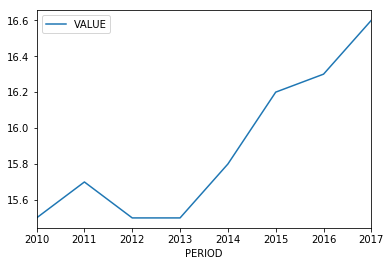

In [202]:
marriage_length.plot()

In [397]:
average_duration_marriage = pd.read_excel("SF_3_2_Family_dissolution_children.xlsx", sheet_name= 'Table SF3.2.A', 
                        header = 3, skipfooter =15)

In [398]:
average_duration_marriage = average_duration_marriage.drop(columns = ["Unnamed: 0"])
average_duration_marriage.columns

Index(['Unnamed: 1', 'Less than 1 year', '1 to 4 years', '5 to 9 years',
       '10 to 14 years', '15 to 19 years', '20+ years', 'Not stated'],
      dtype='object')

In [399]:
average_duration_marriage

,Unnamed: 1,Less than 1 year,1 to 4 years,5 to 9 years,10 to 14 years,15 to 19 years,20+ years,Not stated
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Australia,0.000000,18.661490,23.189946,17.161541,13.403494,27.577399,..
2,Austria,0.270493,20.039986,25.755616,15.929672,13.554040,24.450194,..
3,Belgium,0.024219,16.057157,23.516590,17.018995,14.015846,29.367194,..
4,Canada,0.213945,18.064729,22.627936,17.678479,14.094538,27.316065,..
5,Chile,0.706033,7.958922,11.810013,17.329910,13.543004,39.152760,9.49936
6,Czech Republic,0.162866,14.995076,21.206727,16.612378,14.608742,30.357549,..
7,Denmark,0.292826,18.798141,27.831180,19.994907,14.431218,17.773251,..
8,Estonia,0.541057,21.292171,27.148313,13.335455,10.757479,26.925525,..
9,Finland,0.115031,24.233129,26.840491,16.088957,11.480061,21.211656,..


In [400]:
average_duration_marriage_select = average_duration_marriage.get(
    (average_duration_marriage["Unnamed: 1"] == "Spain") | (average_duration_marriage["Unnamed: 1"] == "Lithuania"))

In [401]:
average_duration_marriage_select

,Unnamed: 1,Less than 1 year,1 to 4 years,5 to 9 years,10 to 14 years,15 to 19 years,20+ years,Not stated
28,Spain,0.279105,13.558152,22.800253,17.355316,14.047304,31.95987,..
38,Lithuania,0.942398,19.136455,23.473411,13.049332,12.183864,31.21454,..
